# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# 1.Importing

In [55]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 2.Load Dataset

In [56]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [57]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3.Extract Features

In [58]:
X = df
y = iris.target

# 4. Preprocess Data

In [59]:
y = (iris.target != 0) * 1

Logistic regression used for `binary classification` problem where the `outcome variable` is categorical and `has two possible vlaues`, meaning it only predicts two possible classes (e.g., `0` or `1`).

To simplify the problem into a binary classification task, the expression converts the labels into two categories:
- `0` for `Setosa`
- `1` for `Non-Setosa`(`Versicolor` and `Virginca`)

# 5.Split the Data into Training and Test Sets

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Create Model

In [61]:
model = LogisticRegression()

# 7. Train the Model

In [62]:
model.fit(X_train, y_train)

LogisticRegression()

# 8.Make Predictions

In [63]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [64]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

In [65]:
y_pred_prob

array([0.99515719, 0.04912847, 0.99999326, 0.99352451, 0.99757791,
       0.04325785, 0.93945994, 0.99929565, 0.99670302, 0.97222336,
       0.99881131, 0.02933505, 0.02304445, 0.03472331, 0.02526114,
       0.99524849, 0.99981414, 0.97206048, 0.9919228 , 0.99974781,
       0.03949857, 0.99780905, 0.04508262, 0.99972435, 0.9999345 ,
       0.99943128, 0.99984055, 0.99985737, 0.03484709, 0.04463767,
       0.0076412 , 0.02161025, 0.99231864, 0.03498497, 0.01856955,
       0.99902772, 0.99298004, 0.03091763, 0.02121783, 0.01726957,
       0.99884888, 0.99098063, 0.99630533, 0.01888123, 0.02852736])

`y_predict` gives you discrete class predictions which is the output of logistic regression, while `y_pred_proba` gives you the confidence (probabilities) behind those predictions which is the output of hypothesis(sigmoid function)

## 8.1 Custom Prediction

In [66]:
new_data=pd.DataFrame([{
    'sepal_length': 5.5,
    'sepal_width': 2.4,
    'petal_length': 3.8,
    'petal_width': 1.1
} ])
new_prediction = model.predict(new_data)
new_prediction_prob = model.predict_proba(new_data)
print(f"Predicted Class: {'Setosa' if new_prediction[0] == 0 else 'Non-Setosa'}")
print(f"Prediction Probability for Setosa    : {new_prediction_prob[0][0]:.4f}")
print(f"Prediction Probability for NonSetosa : {new_prediction_prob[0][1]:.4f}")

Predicted Class: Non-Setosa
Prediction Probability for Setosa    : 0.0331
Prediction Probability for NonSetosa : 0.9669


## 8.2 Why Logistic Regression used for?
Logistic Regression is used for binary classification, so there have only two class for input variable. For a set of input variables, logistic regression predicts which class those input variables belong to.

# 9.Evaluation Metrics

In [67]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [68]:
print(f"Accuracy  : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall    : {recall}")
print(f"F1-Score  : {f1}")
print(f"ROC-AUC   : {roc_auc}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1-Score  : 1.0
ROC-AUC   : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 10. Visualization

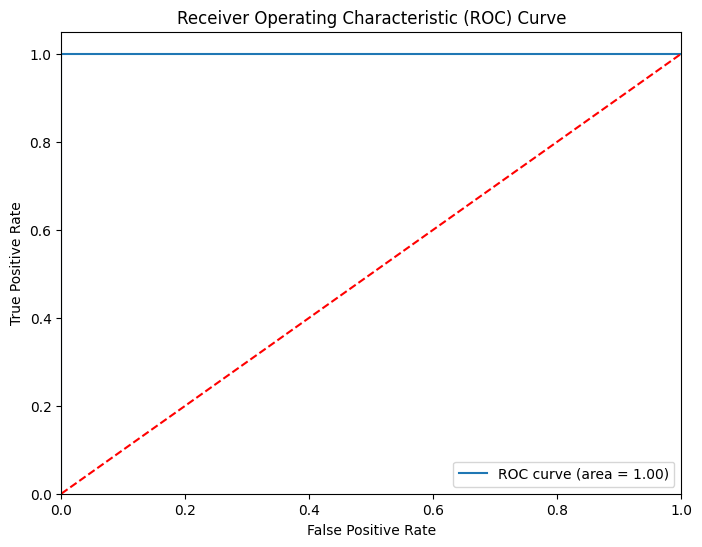

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Visualization of ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 11.Logistic regression decision boundary plot

In [70]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(10, 6))

    plt.scatter(X, y, color='gray', label='Data points', alpha=0.5)

    x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    y_proba = model.predict_proba(x_range)[:, 1]
    
    plt.plot(x_range, y_proba, color='red', label='Logistic Regression Curve')

    plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')

    plt.title('Logistic Regression Decision Boundary (1D)')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Probability of Being Setosa')
    plt.legend()
    plt.show()


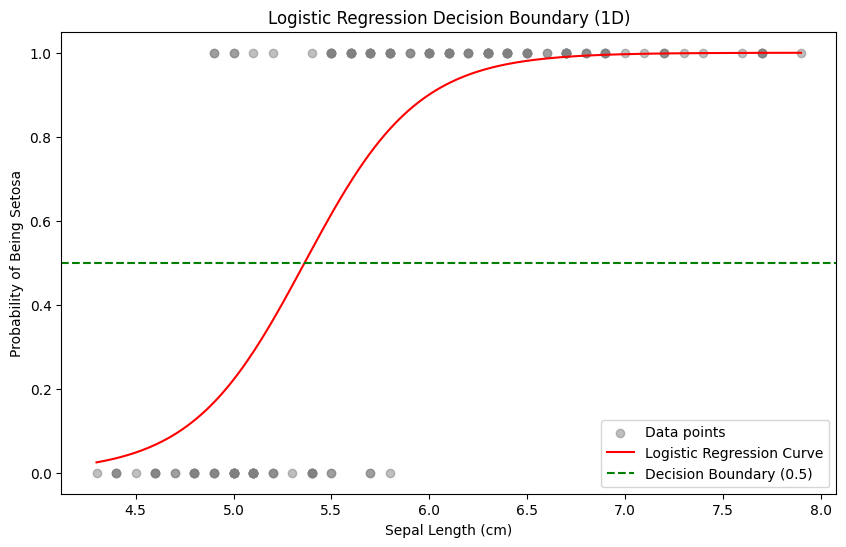

In [71]:
X = df[['sepal_length']].values

model = LogisticRegression()
model.fit(X, y)

plot_decision_boundary(X, y, model)